calling imports

In [10]:
from fastai.vision.all import *
from pathlib import Path
import numpy as np
from loss_functions.triplet_loss import TripletLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

L2 normalization function

In [8]:
class L2_norm(nn.Module):
    def __init__(self):
        super(L2_norm, self).__init__()

    def forward(self, x):
        return F.normalize(x, p=2, dim=-1)

In [5]:
from fastai.vision.all import *

path = "/mnt/sda/nikhil/pbb/iml/"
train_path = "/mnt/sda/nikhil/pbb/iml/train/"
valid_path = "/mnt/sda/nikhil/pbb/iml/valid/"

# Define the transformations and batch size
item_tfms = Resize(224)
batch_size = 64

# Define the data block
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(train_name='train', valid_name='valid'))

# Create the dataloaders for training and validation sets
dls = dblock.dataloaders(path, item_tfms=item_tfms, bs=batch_size)
print(dls.train_ds.items[0])
print(dls.valid_ds.items[0])

/mnt/sda/nikhil/pbb/iml/train/mid/04995-base_zl_20_03283_tx_268729_ty_595319__from_1S_134-135_-pine-middle.jpg
/mnt/sda/nikhil/pbb/iml/valid/mid/23772-base_zl_20_tx_893080_ty_409455__from_3s_119_136-pine-middle.jpg


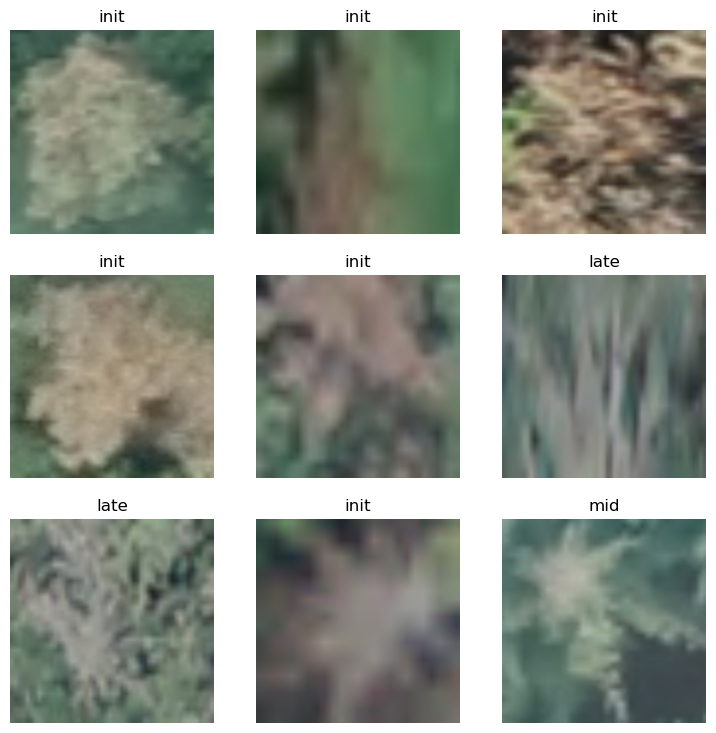

In [4]:

dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet50, pretrained=True)

# Modify the second layer of the ResNet-50 model
layers = learn.model[1]
learn.model[1] = nn.Sequential(layers[0], layers[1], layers[2], layers[3], nn.Linear(in_features=4096, out_features=128, bias=False), L2_norm()).to(device)

# Set the model directory
learn.model_dir = '/mnt/sda/nikhil/pbb/imlmodels/'

In [12]:
#triplet loss
learn.loss_func = TripletLoss(device)

SuggestedLRs(valley=0.02754228748381138)

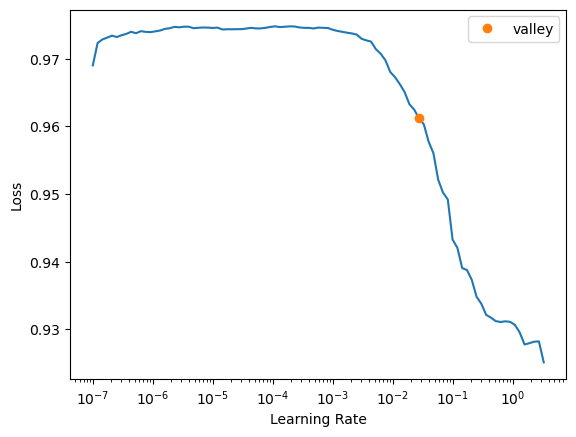

In [7]:
# Run the learning rate finder
learn.lr_find()





In [14]:
lr = 0.02
learn.fit_one_cycle(10, slice(lr))



epoch,train_loss,valid_loss,time


RuntimeError: CUDA out of memory. Tried to allocate 98.00 MiB (GPU 0; 10.75 GiB total capacity; 8.15 GiB already allocated; 14.12 MiB free; 8.31 GiB reserved in total by PyTorch)

In [11]:
learn.save('stage1_weights')
learn.load('stage1_weights')
learn.unfreeze()
learn.lr_find()


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8432dc4f70>
Traceback (most recent call last):
  File "/home/nikhil/anaconda3/envs/ptc/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/nikhil/anaconda3/envs/ptc/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1301, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/nikhil/anaconda3/envs/ptc/lib/python3.9/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/home/nikhil/anaconda3/envs/ptc/lib/python3.9/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/home/nikhil/anaconda3/envs/ptc/lib/python3.9/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/home/nikhil/anaconda3/envs/ptc/lib/python3.9/selectors.py", line 416, in select
    fd_event_list = self.

RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 10.75 GiB total capacity; 9.38 GiB already allocated; 16.12 MiB free; 9.58 GiB reserved in total by PyTorch)

NameError: name 'learn' is not defined

In [15]:
lr = 1.096
learn.fit_one_cycle(10, slice(lr))
learn.save('stage2_weights')

epoch,train_loss,valid_loss,time
0,0.928260,2.002362,01:37
1,0.930020,1.887904,01:46
2,0.929078,1.904317,01:52
3,0.928998,1.668131,01:53
4,0.928017,1.691515,02:00
5,0.926705,1.775430,02:05
6,0.928038,1.775926,02:04
7,0.927857,1.704160,02:04
8,0.927805,1.764529,02:03
9,0.928271,1.798252,02:03


Path('/mnt/sda/nikhil/pbb/models/stage2_weights.pth')

SuggestedLRs(valley=0.04786301031708717)

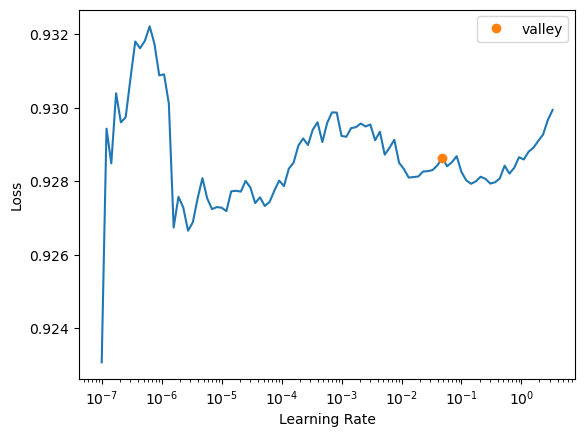

In [16]:
learn.load('stage2_weights')
learn.unfreeze()
learn.lr_find()


In [18]:
lr = 0.0478
learn.fit_one_cycle(10, slice(lr))
learn.save('stage3_weights')

epoch,train_loss,valid_loss,time
0,0.926319,1.770086,02:01
1,0.927271,1.749271,02:04
2,0.924816,1.794401,02:05
3,0.926261,1.729854,02:09
4,0.925287,1.796544,02:09
5,0.925831,1.816191,02:06
6,0.923735,1.778685,02:06
7,0.923584,1.790537,02:08
8,0.923791,1.803821,02:09
9,0.923876,1.787736,02:08


Path('/mnt/sda/nikhil/pbb/models/stage3_weights.pth')